### 哪個因素（面積、商品數、顧客數）對銷售額影響最大？

## 目標

##### 比較不同變數對銷售額的貢獻度，協助行銷或資源配置優化。

## 簡介

##### 此資料集包含了超市的銷售數據，可用於分析商店面積、日常顧客數量等變數與其銷售額之間的關係。

##### 變數說明：

##### Store ID：特定商店的（索引）編號

##### Store_Area：商店的實體面積

##### Items_Available：商店內可供販售的商品數量

##### Daily_Customer_Count：一個月內平均每日光顧商店的顧客數量

##### Store_Sales：商店的銷售額（以美元計）

### 讀取數據

In [8]:
import pandas as pd
import numpy as np

#### 評估數據結構

In [10]:
original_data=pd.read_csv("supermarket_sales.csv")
original_data.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


##### 每一列爲一個觀察值，每一欄為一個變量，數據結構整齊。

#### 評估數據乾淨度

In [13]:
cleaned_data=original_data.copy()

In [14]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


##### Store ID資料型態應為字串，每個變量皆無缺失值。

In [16]:
cleaned_data["Store ID "]=cleaned_data["Store ID "].astype(str)

#### 評估重複數據

##### Store ID為特定商店的編號，不應該存在重複。

In [19]:
cleaned_data.duplicated(subset="Store ID ").sum()

0

#### 評估無效數據或錯誤數據

In [21]:
cleaned_data.describe()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000
mean,1485.409598,1782.035714,786.350446,59351.305804
std,250.237011,299.872053,265.389281,17190.741895
min,775.000000,932.000000,10.000000,14920.000000
25%,1316.750000,1575.500000,600.000000,46530.000000
50%,1477.000000,1773.500000,780.000000,58605.000000
75%,1653.500000,1982.750000,970.000000,71872.500000
max,2229.000000,2667.000000,1560.000000,116320.000000


##### 以上資料並無脫離現實意義的數字。

In [23]:
cleaned_data.to_csv("supermarket_sales_cleaned.csv",index=False)

### 探索數據

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette="pastel"

#### Store_Area和Store_Sales的關係

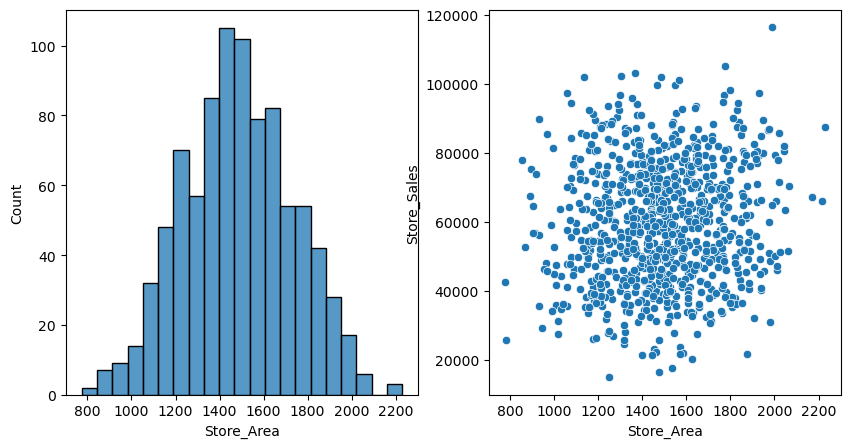

In [27]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data,x="Store_Area",ax=axes[0])
sns.scatterplot(cleaned_data,x="Store_Area",y="Store_Sales",ax=axes[1])
plt.show()

##### 商店面積服從常態分配，但與商店銷收額並無明顯的線性關係。

#### Items_Available和Store_Sales的關係

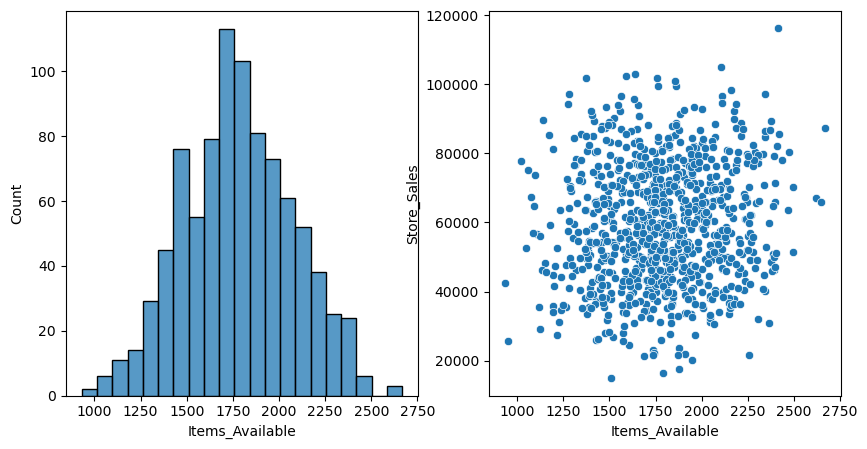

In [30]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data,x="Items_Available",ax=axes[0])
sns.scatterplot(cleaned_data,x="Items_Available",y="Store_Sales",ax=axes[1])
plt.show()

##### 商品數量服從常態分配，但與商店銷收額並無明顯的線性關係。

#### Daily_Customer_Count和Store_Sales的關係

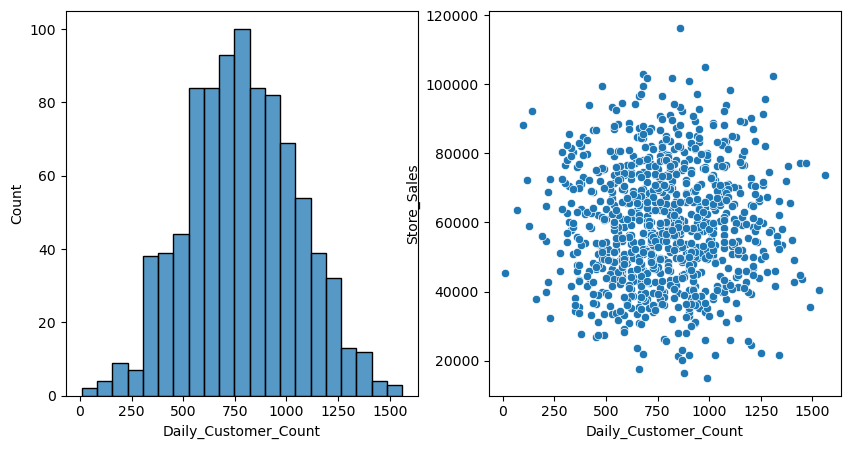

In [33]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.histplot(cleaned_data,x="Daily_Customer_Count",ax=axes[0])
sns.scatterplot(cleaned_data,x="Daily_Customer_Count",y="Store_Sales",ax=axes[1])
plt.show()

##### 每日來店顧客數量服從常態分配，但與商店銷收額並無明顯的線性關係。

#### 探索銷售額與其他變數間的關係

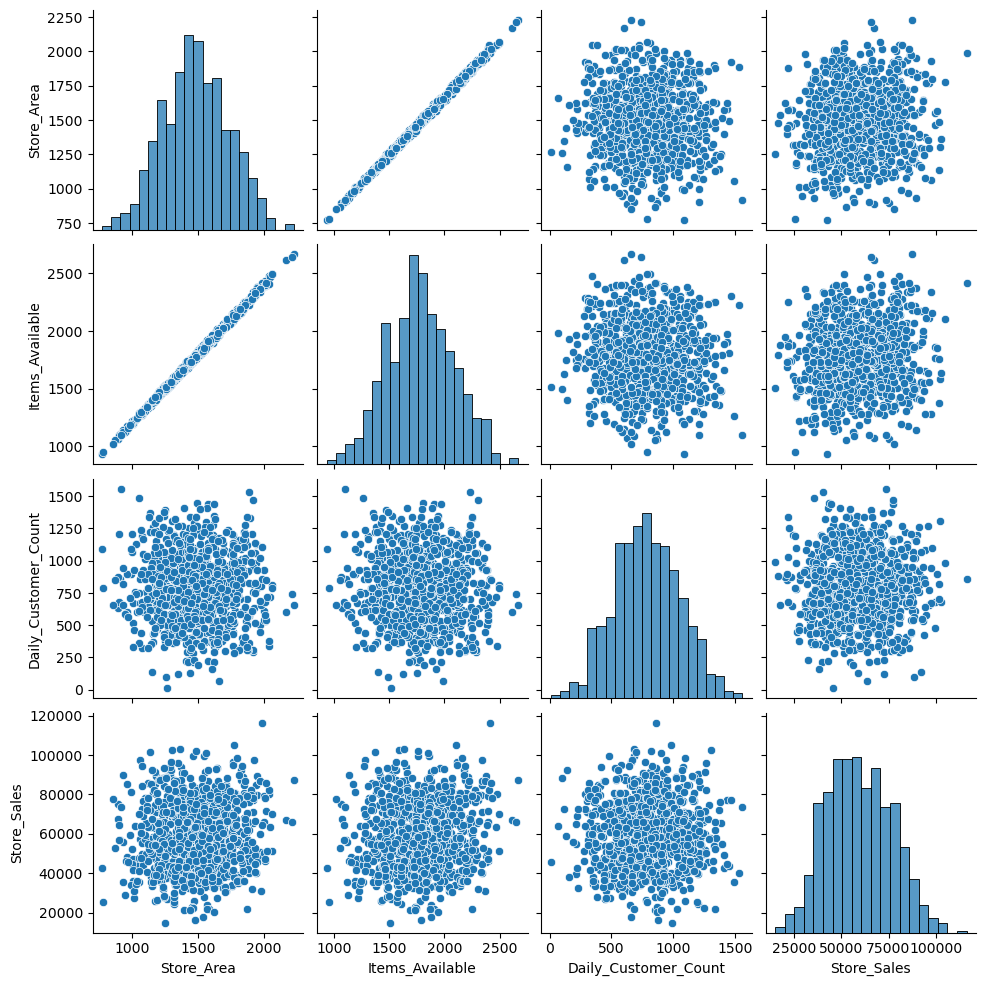

In [36]:
sns.pairplot(cleaned_data)
plt.show()

##### Store_Area與Items_Available間具有高度線性相關。

### 分析數據

In [39]:
import statsmodels.api as sm
lr_data=cleaned_data.copy()

#### 建立模型

In [41]:
lr_data=lr_data.drop("Store ID ",axis=1)
lr_data.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


In [42]:
lr_data=pd.get_dummies(lr_data,drop_first=True)

In [43]:
y=lr_data["Store_Sales"]

In [44]:
x=lr_data.drop("Store_Sales",axis=1)

In [45]:
x.corr().abs()>0.8

,Store_Area,Items_Available,Daily_Customer_Count
Store_Area,True,True,False
Items_Available,True,True,False
Daily_Customer_Count,False,False,True


##### 以上結果顯示Items_Available和Store_Area相關係數的絕對值大於0.8，會導致共線性，因此需移除一個變量。

In [47]:
x=x.drop("Store_Area",axis=1)

In [48]:
x=sm.add_constant(x)
x

,const,Items_Available,Daily_Customer_Count
0,1.0,1961,530
1,1.0,1752,210
2,1.0,1609,720
3,1.0,1748,620
4,1.0,2111,450
...,...,...,...
891,1.0,1910,1080
892,1.0,1663,850
893,1.0,1436,1060
894,1.0,1560,770


In [49]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Store_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.479
Date:                Fri, 27 Jun 2025   Prob (F-statistic):             0.0116
Time:                        15:00:56   Log-Likelihood:                -10004.
No. Observations:                 896   AIC:                         2.001e+04
Df Residuals:                     893   BIC:                         2.003e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4.855e+04   3908.008     12.424      0.000    4.09e+04    5.62e+04
Items_Available          5.6966      1.910      2.982      0.003       1.947       9.446
Daily_Customer_Count     0.8227      2.159      0.381      0.703      -3.414       5.059
==============================================================================
Omnibus:                       15.622   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.143
Skew:                           0.157   Prob(JB):                      0.00380
Kurtosis:                       2.553   Cond. No.                     1.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Daily_Customer_Count的p值大於0.05，表示此變量對於Store_Sales沒有顯著的影響，因此需剔除再進行擬合。

In [51]:
x=x.drop("Daily_Customer_Count",axis=1)

In [52]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Store_Sales   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     8.822
Date:                Fri, 27 Jun 2025   Prob (F-statistic):            0.00306
Time:                        15:00:56   Log-Likelihood:                -10004.
No. Observations:                 896   AIC:                         2.001e+04
Df Residuals:                     894   BIC:                         2.002e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            4.925e+04   3447.710     14.286      0.000    4.25e+04     5.6e+04
Items_Available     5.6667      1.908      2.970      0.003       1.922       9.411
==============================================================================
Omnibus:                       15.742   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.221
Skew:                           0.158   Prob(JB):                      0.00366
Kurtosis:                       2.552   Cond. No.                     1.09e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 結論

##### 依據上述資料得知，模型預測當Items_Available增加，會顯著增加商店銷售額。
##### 因為Items_Available和Store_Area具有高度線性相關，當Store_Area增加時，Items_Available也會增加，因此會影響商店銷售額。
##### Daily_Customer_Count的p值大於0.05，表示此變量對於Store_Sales並沒有顯著的影響。¶